Our dataset is a classification. Becase it is going to represent wether a purson has diabetes or not. So it is a classification problem.

Let's start!

###1.Setting up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ML_Assignment")

###2.Reading the dataset

In [ ]:
import pandas as pd

In [ ]:
diabetes = pd.read_csv("diabetes_prediction_dataset_2 .csv")
diabetes.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1    Male  28.0             0              0           never  27.32   
2  Female  36.0             0              0         current  23.45   
3    Male  76.0             1              1         current  20.14   
4  Female  20.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          5.7                  158         0  
2          5.0                  155         0  
3          4.8                  155         0  
4          6.6                   85         0

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65638 entries, 0 to 65637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               65638 non-null  object 
 1   age                  65638 non-null  float64
 2   hypertension         65638 non-null  int64  
 3   heart_disease        65638 non-null  int64  
 4   smoking_history      65638 non-null  object 
 5   bmi                  65638 non-null  float64
 6   HbA1c_level          65638 non-null  float64
 7   blood_glucose_level  65638 non-null  int64  
 8   diabetes             65638 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.5+ MB


###3.Explore the data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

###3.1 Understaing the distribution of the features

In [ ]:
features = diabetes.columns.drop('diabetes').tolist()

In our data set diabetes is the dependand variable. It means it is the 'Y' part.

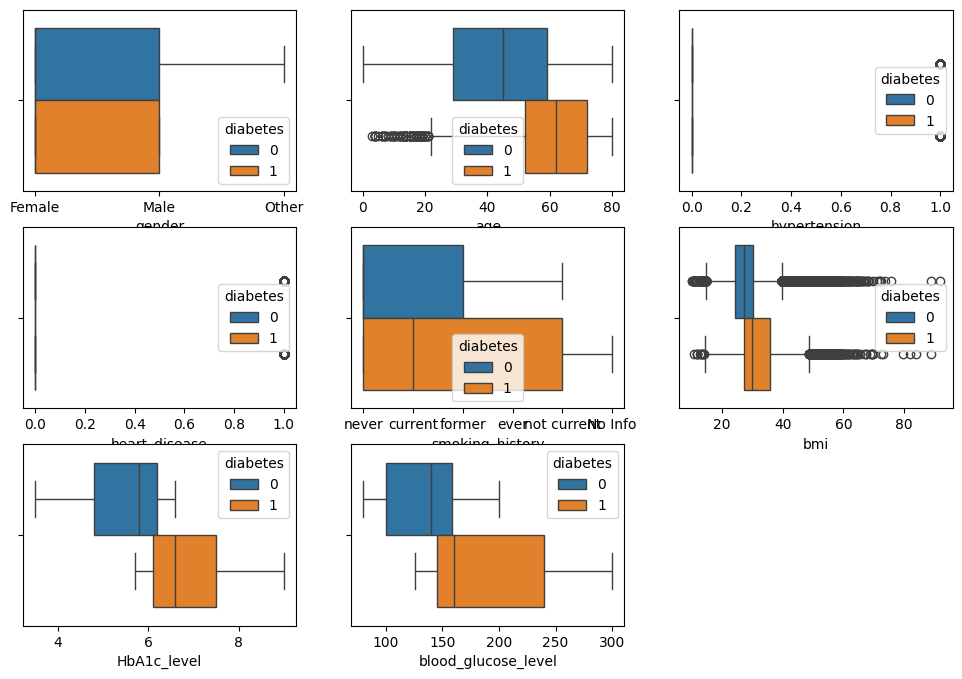

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
axs = axs.flatten()

for index, feature in enumerate(features):
  sns.boxplot(data=diabetes, x=feature, hue='diabetes', ax=axs[index])

# Set the 6th subplot as invisible
axs[8].set_visible(False)
plt.show()

It create 8 subplots for selected feature from the dataset (diabetes).

###3.2.Check whether there are any highly correlated features

In [ ]:
corr_matrix = diabetes.corr()

<ipython-input-9-27e53b2ee576>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = diabetes.corr()


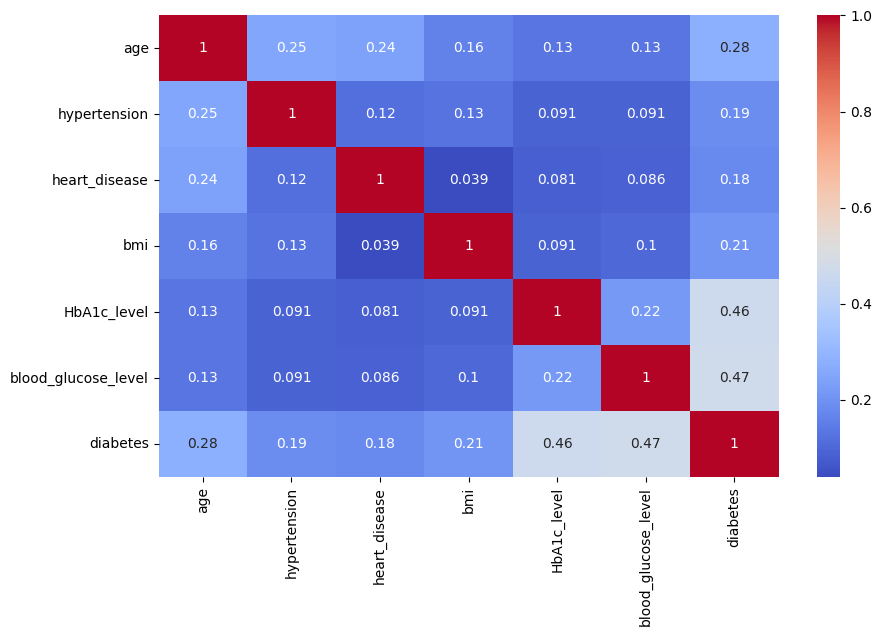

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', ax=ax)
plt.show()

### 4.Data Preprocessing


In [ ]:
print(diabetes.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


check wether null values have or not. It does not have null values. So we don't want to remove null values.


In [ ]:
print(diabetes.duplicated().sum())

934


check whether the duplicate values have or not(Row wise). it has 934 duplicates values. so it means we have to remove those values.

In [ ]:
diabetes = diabetes.drop_duplicates()

In [ ]:
diabetes.duplicated().sum()

0

In [ ]:
diabetes = diabetes.dropna()

In [ ]:
data = diabetes.copy(deep=True)

In [ ]:
data['gender'].value_counts()

Female    38939
Male      25753
Other        12
Name: gender, dtype: int64

we have to set categorical data into numerical data.

In [ ]:
gender = pd.get_dummies(data['gender'], drop_first=True)
data = pd.concat([data, gender], axis=1)
data = data.drop(['gender'], axis=1)

In [ ]:
data.head()

age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0  80.0             0              1           never  25.19          6.6   
1  28.0             0              0           never  27.32          5.7   
2  36.0             0              0         current  23.45          5.0   
3  76.0             1              1         current  20.14          4.8   
4  20.0             0              0           never  27.32          6.6   

   blood_glucose_level  diabetes  Male  Other  
0                  140         0     0      0  
1                  158         0     1      0  
2                  155         0     0      0  
3                  155         0     1      0  
4                   85         0     0      0

In [ ]:
diabetes['smoking_history'].value_counts()

never          34398
former          9299
current         9197
not current     6367
ever            3998
No Info         1445
Name: smoking_history, dtype: int64

dummy variable creation

In [ ]:
smoking_history = pd.get_dummies(data['smoking_history'], drop_first=True)
data = pd.concat([data, smoking_history], axis=1)
data = data.drop(['smoking_history'], axis=1)

In [ ]:
data.head()

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  28.0             0              0  27.32          5.7                  158   
2  36.0             0              0  23.45          5.0                  155   
3  76.0             1              1  20.14          4.8                  155   
4  20.0             0              0  27.32          6.6                   85   

   diabetes  Male  Other  current  ever  former  never  not current  
0         0     0      0        0     0       0      1            0  
1         0     1      0        0     0       0      1            0  
2         0     0      0        1     0       0      0            0  
3         0     1      0        1     0       0      0            0  
4         0     0      0        0     0       0      1            0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64704 entries, 0 to 65637
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  64704 non-null  float64
 1   hypertension         64704 non-null  int64  
 2   heart_disease        64704 non-null  int64  
 3   bmi                  64704 non-null  float64
 4   HbA1c_level          64704 non-null  float64
 5   blood_glucose_level  64704 non-null  int64  
 6   diabetes             64704 non-null  int64  
 7   Male                 64704 non-null  uint8  
 8   Other                64704 non-null  uint8  
 9   current              64704 non-null  uint8  
 10  ever                 64704 non-null  uint8  
 11  former               64704 non-null  uint8  
 12  never                64704 non-null  uint8  
 13  not current          64704 non-null  uint8  
dtypes: float64(3), int64(4), uint8(7)
memory usage: 4.4 MB


### 5.Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_updated = data.columns.drop(['diabetes', 'blood_glucose_level']).tolist()

Removed the dipendent variable(y) and one hightly corerelated independent variable checking with the heatmap.

In [ ]:
print(features_updated)

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'Male', 'Other', 'current', 'ever', 'former', 'never', 'not current']


In [ ]:
X = data[features_updated]
y = data['diabetes']

In [ ]:
# Checking for class imbalance
y.value_counts(normalize=True)

0    0.868911
1    0.131089
Name: diabetes, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

In [ ]:
y_test.value_counts(normalize=True)

0    0.868896
1    0.131104
Name: diabetes, dtype: float64

### 6.Model Development


#### 6.1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Normalize features in machine learning training and testing data for consistent scale.

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_log_reg

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
log_reg.feature_names_in_

array(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'Male', 'Other', 'current', 'ever', 'former', 'never',
       'not current'], dtype=object)

In [ ]:
log_reg.coef_

array([[ 0.04655578,  0.60541463,  0.80798069,  0.08652093,  2.26005563,
         0.2699967 , -0.02297965, -5.16643731, -5.35343522, -5.31592976,
        -5.39427895, -5.46885555]])

In [ ]:
lr_base_coef_df = pd.DataFrame({'feature':log_reg.feature_names_in_ , 'lr_coef':log_reg.coef_[0]})
lr_base_coef_df

feature   lr_coef
0             age  0.046556
1    hypertension  0.605415
2   heart_disease  0.807981
3             bmi  0.086521
4     HbA1c_level  2.260056
5            Male  0.269997
6           Other -0.022980
7         current -5.166437
8            ever -5.353435
9          former -5.315930
10          never -5.394279
11    not current -5.468856

In [ ]:
from sklearn.model_selection import  StratifiedKFold

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
accuracy = accuracy_score(y_test, y_pred_log_reg)

This code calculates precision, recall, F1 score and accuracy for a logistic regression model's prediction on the test set.

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

Precision: 0.8882539682539683
Recall: 0.5497053045186641
F1-score: 0.6791262135922331
Accuracy: 0.9318977951782402


##### 6.1.2. Visualizations for classification metrices / reports

In [ ]:
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import roc_auc
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import discrimination_threshold
from yellowbrick.classifier import precision_recall_curve

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


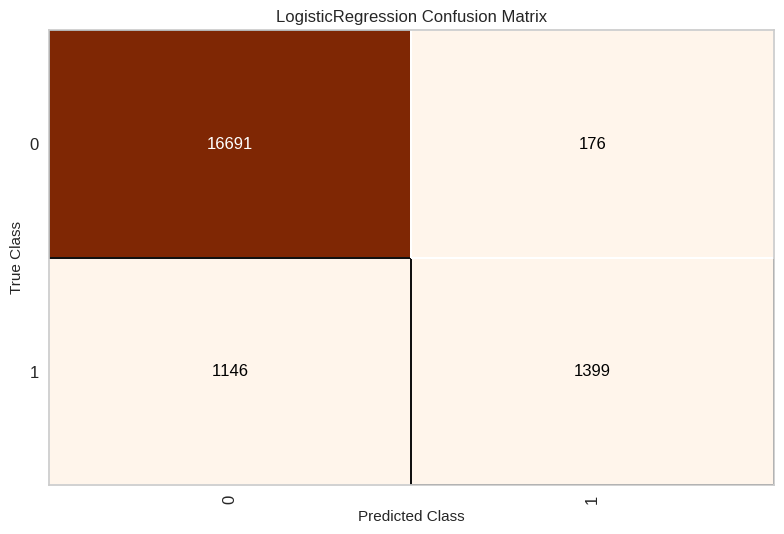

In [ ]:
conf_matrix_log_reg_base = confusion_matrix(log_reg, X_test, y_test, cmap="Oranges")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


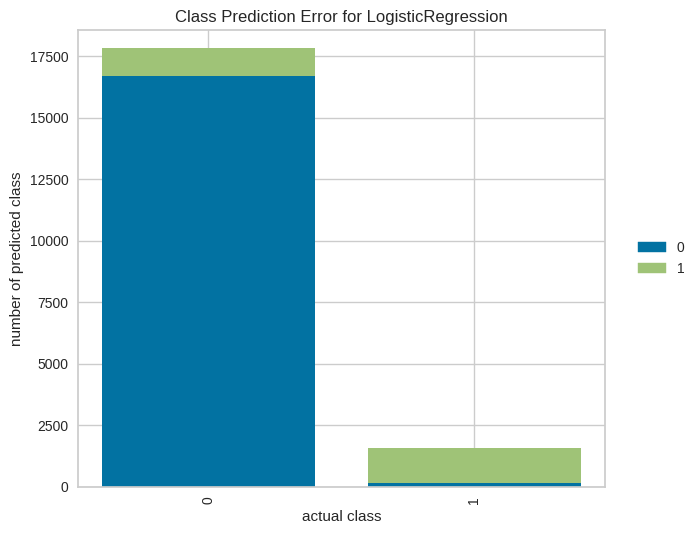

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>,
                     estimator=LogisticRegression())

In [ ]:
class_prediction_error(log_reg, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


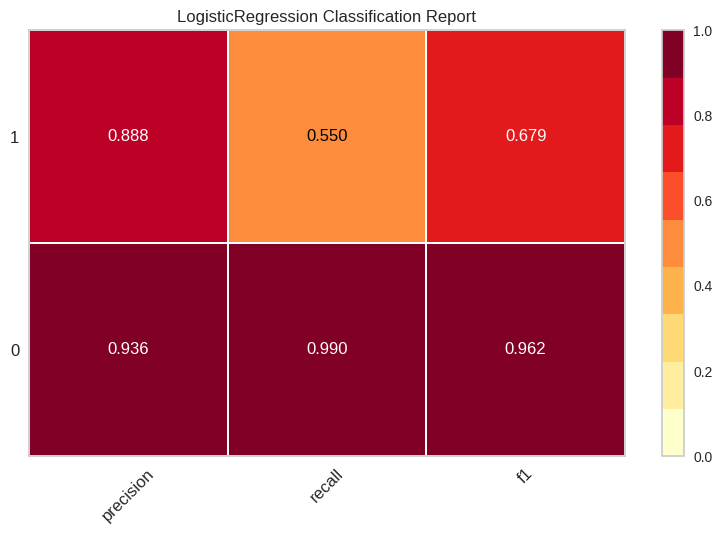

In [ ]:
class_report_log_reg_base = classification_report(log_reg, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


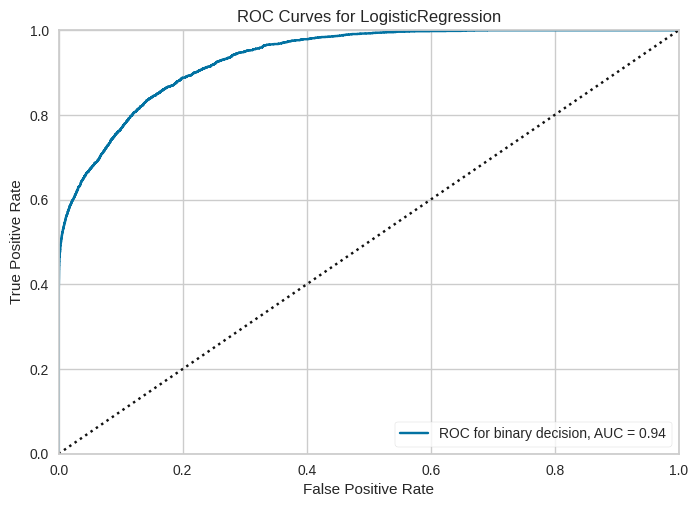

In [ ]:
roc_log_reg_base = roc_auc(log_reg, X_test, y_test, binary=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


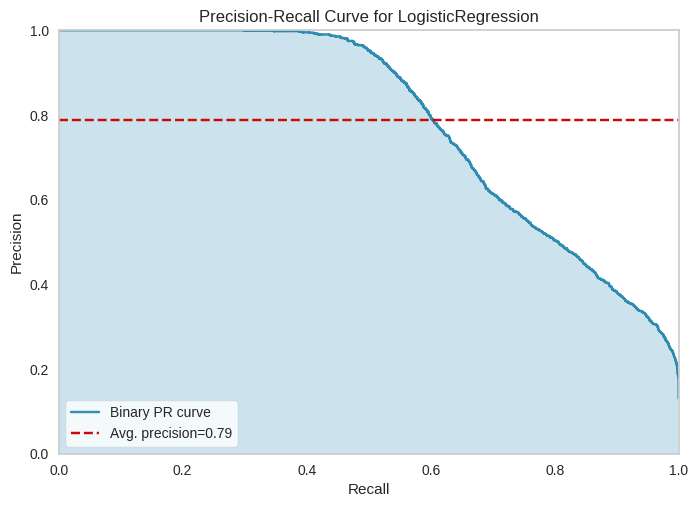

In [ ]:
prec_recall_log_reg = precision_recall_curve(log_reg, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

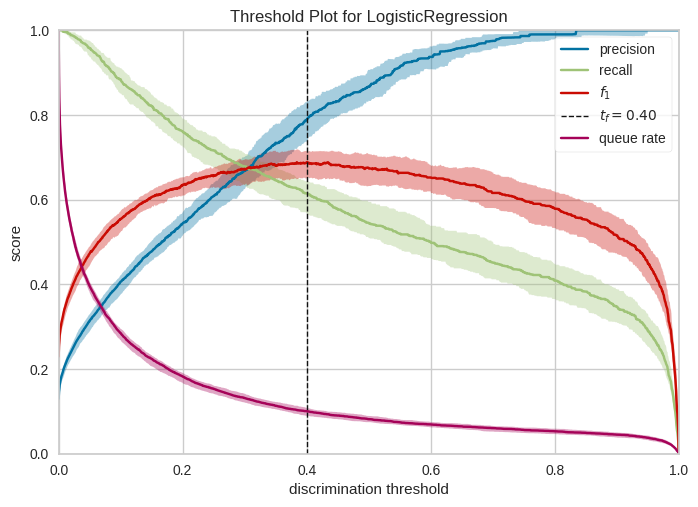

In [ ]:
disc_thresh_log_reg = discrimination_threshold(log_reg, X_test, y_test)

#### 6.2.Support Vector Machines

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, DiscriminationThreshold

In [ ]:
X_train.head()

age  hypertension  heart_disease    bmi  HbA1c_level  Male  Other  \
4878   18.0             0              0  27.32          6.6     0      0   
7370   29.0             0              0  23.34          6.2     0      0   
6559   37.0             0              0  21.96          6.2     0      0   
37893  60.0             1              0  27.32          6.8     0      0   
47684  46.0             0              0  27.32          8.8     0      0   

       current  ever  former  never  not current  
4878         0     0       0      1            0  
7370         0     0       0      1            0  
6559         0     1       0      0            0  
37893        0     0       0      1            0  
47684        0     0       1      0            0

In [ ]:
scaler = StandardScaler()

X_train_sc = X_train.copy(deep=True)
X_test_sc = X_test.copy(deep=True)

X_train_sc[X_train_sc.columns] = scaler.fit_transform(X_train_sc[X_train_sc.columns])
X_test_sc[X_test_sc.columns] = scaler.fit_transform(X_test_sc[X_test_sc.columns])

In [ ]:
X_train_sc.head()

age  hypertension  heart_disease       bmi  HbA1c_level      Male  \
4878  -1.473574     -0.333530      -0.229597 -0.177728     0.900444 -0.817894   
7370  -0.911895     -0.333530      -0.229597 -0.783170     0.542029 -0.817894   
6559  -0.503401     -0.333530      -0.229597 -0.993097     0.542029 -0.817894   
37893  0.671019      2.998235      -0.229597 -0.177728     1.079651 -0.817894   
47684 -0.043846     -0.333530      -0.229597 -0.177728     2.871723 -0.817894   

          Other   current      ever    former     never  not current  
4878  -0.014098 -0.406838 -0.257773 -0.407870  0.940269    -0.332302  
7370  -0.014098 -0.406838 -0.257773 -0.407870  0.940269    -0.332302  
6559  -0.014098 -0.406838  3.879383 -0.407870 -1.063526    -0.332302  
37893 -0.014098 -0.406838 -0.257773 -0.407870  0.940269    -0.332302  
47684 -0.014098 -0.406838 -0.257773  2.451764 -1.063526    -0.332302

In [ ]:
X_test_sc.head()

age  hypertension  heart_disease       bmi  HbA1c_level      Male  \
4861  -0.608050     -0.337591      -0.228469 -0.560983     0.087158  1.246815   
45702 -2.194295     -0.337591      -0.228469 -1.729079     0.087158  1.246815   
39793  0.875857     -0.337591      -0.228469 -0.846585    -1.892418 -0.802044   
2357   0.824688     -0.337591      -0.228469  0.058576     0.357100  1.246815   
16723  0.875857     -0.337591      -0.228469 -0.573072     0.447081  1.246815   

          Other   current      ever    former     never  not current  
4861  -0.012433 -0.407549 -0.253945  2.416116 -1.069702    -0.325822  
45702 -0.012433 -0.407549 -0.253945 -0.413887  0.934840    -0.325822  
39793 -0.012433 -0.407549 -0.253945 -0.413887  0.934840    -0.325822  
2357  -0.012433 -0.407549 -0.253945 -0.413887 -1.069702     3.069162  
16723 -0.012433 -0.407549 -0.253945  2.416116 -1.069702    -0.325822

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train_sc, y_train)
y_pred_svc = svc.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
accuracy = accuracy_score(y_test, y_pred_svc)

This code calculates precision, recall, F1 score and accuracy for a Support vector machine predictions on the test set.

In [ ]:
print("Precision:",precision)
print("Recall:",recall)
print("F1-score:",f1)
print("Accuracy:",accuracy)

Precision: 0.9890848026868178
Recall: 0.4628683693516699
F1-score: 0.6306209850107066
Accuracy: 0.9289099526066351


##### 6.2.1. Visualizations for classification metrices / reports

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


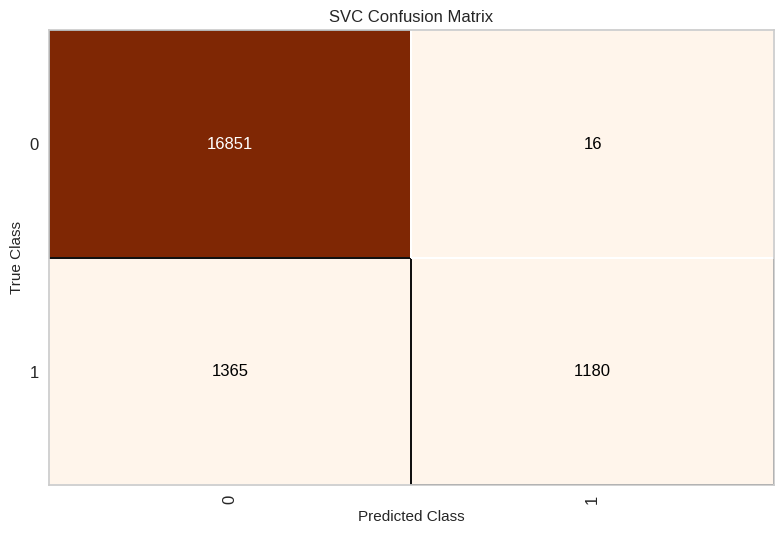

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
conf_matrix_svc = confusion_matrix(svc, X_test_sc, y_test, cmap="Oranges")
conf_matrix_svc.fit(X_train_scaled, y_train)
conf_matrix_svc.score(X_test_scaled, y_test)
conf_matrix_svc.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


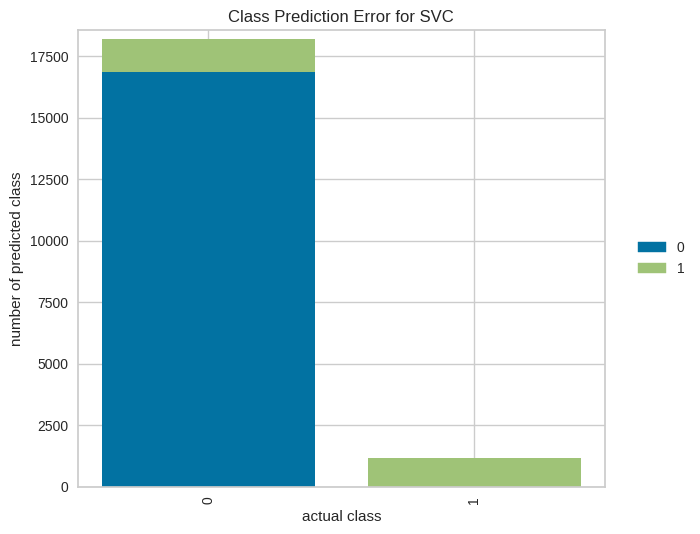

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
class_error_svm = ClassPredictionError(svc, classes=svc.classes_)
class_error_svm.score(X_test_scaled, y_test)
class_error_svm.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


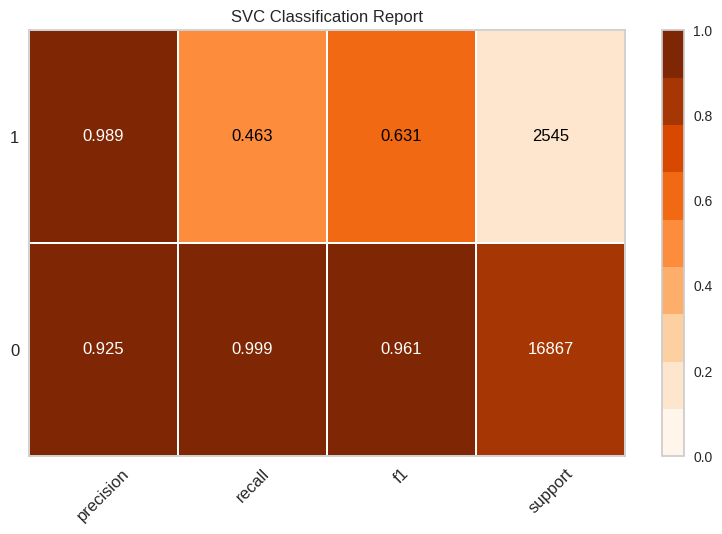

<Axes: title={'center': 'SVC Classification Report'}>

In [ ]:
class_report_svm = ClassificationReport(svc, classes=svc.classes_, support=True, cmap="oranges")
class_report_svm.fit(X_train_scaled, y_train)
class_report_svm.score(X_test_scaled, y_test)
class_report_svm.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


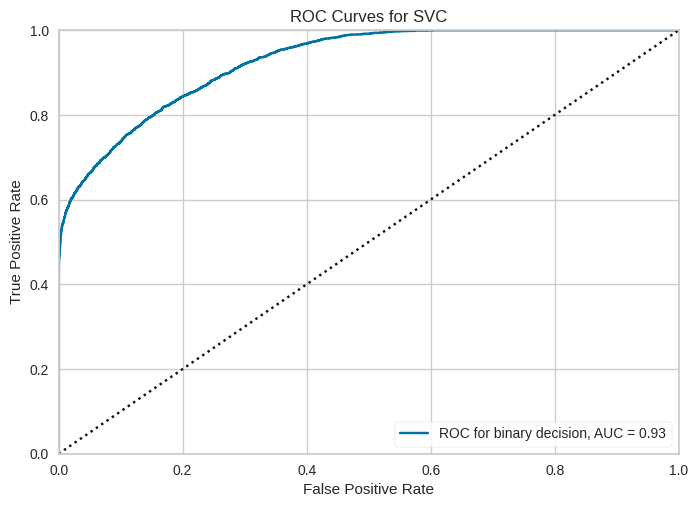

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
roc_svm = ROCAUC(svc, classes=svc.classes_, binary=True)
roc_svm.fit(X_train_scaled, y_train)
roc_svm.score(X_test_scaled, y_test)
roc_svm.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


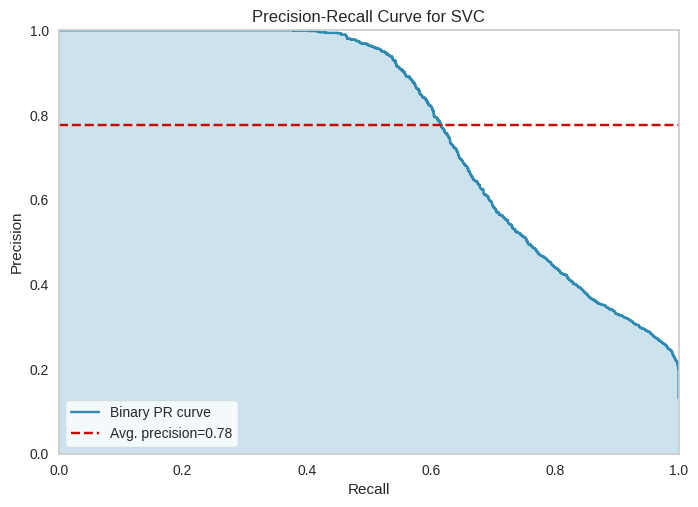

<Axes: title={'center': 'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
prec_recall_svm = PrecisionRecallCurve(svc, classes=svc.classes_)
prec_recall_svm.fit(X_train_scaled, y_train)
prec_recall_svm.score(X_test_scaled, y_test)
prec_recall_svm.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


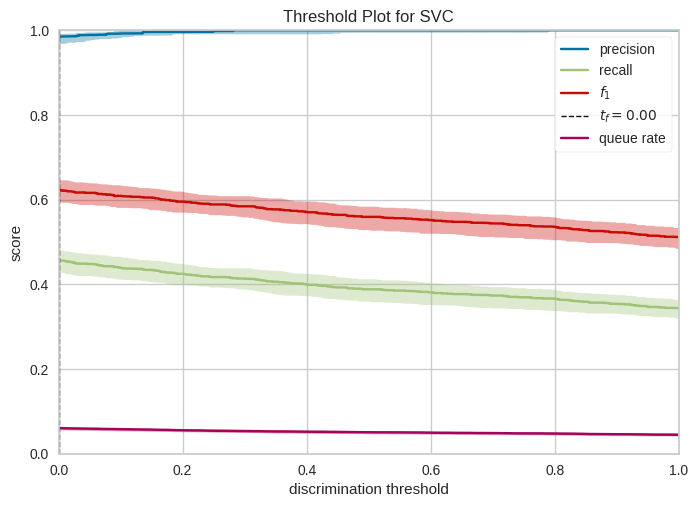

<Axes: title={'center': 'Threshold Plot for SVC'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
disc_thresh_svm = DiscriminationThreshold(svc)
disc_thresh_svm.fit(X_train_scaled, y_train)
disc_thresh_svm.score(X_test_scaled, y_test)
disc_thresh_svm.show()

Create a discrimination threshold plot

##### 6.2.2.Support Vector Machine Related Visualizations

In [ ]:
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

In [ ]:
pca_2d = PCA(n_components=2)
pc_df = pd.DataFrame(pca_2d.fit_transform(X_train_sc))
pc_df.columns = ["PC1", "PC2"]

In [ ]:
pc_df.head()

PC1       PC2
0 -1.616312 -0.426325
1 -1.576004 -0.396583
2  0.144020  1.175317
3  0.312187 -2.224865
4  1.675264 -0.302700

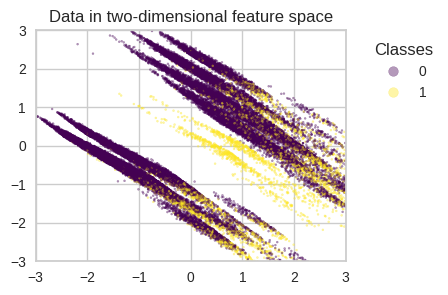

In [ ]:
# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(pc_df.values[:, 0], pc_df.values[:, 1], s=2, c=y_train.values, cmap = 'viridis', alpha=0.4,label=y_train.values)
ax.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Data in two-dimensional feature space")
_ = plt.show()

In [ ]:
def plot_training_data_with_decision_boundary(kernel):
    # Train the SVC
    clf = SVC(kernel=kernel).fit(pc_df.values, y_train)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -4, 4, -4, 4
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": pc_df.values, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=5,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(pc_df.values[:,0], pc_df.values[:, 1], c=y_train.values, s=2, alpha=0.4,  cmap = 'viridis')
    ax.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1.0), loc='upper left')
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

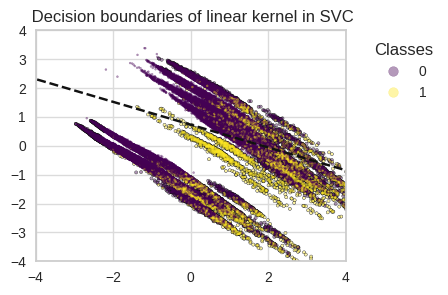

In [ ]:
plot_training_data_with_decision_boundary("linear")

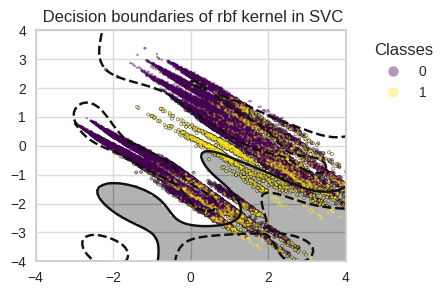

In [ ]:
plot_training_data_with_decision_boundary("rbf")

#### 6.3.Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=55)

In [ ]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=55)

In [ ]:
y_pred_dt = clf_dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.9018133113538018

In [ ]:
accuracy_score(y_train, clf_dt.predict(X_train))

0.9959153934469663

In [ ]:
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test,y_pred_dt)
f1 = f1_score(y_test,y_pred_dt)
accuracy = accuracy_score(y_test,y_pred_dt)

This code calculates precision, recall, F1 score and accuracy for a decision tree predictions on the test set.

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

Precision: 0.623121387283237
Recall: 0.6353634577603143
F1-score: 0.6291828793774319
Accuracy: 0.9018133113538018


##### 6.3.1. Visualizations for decision tree / reports

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


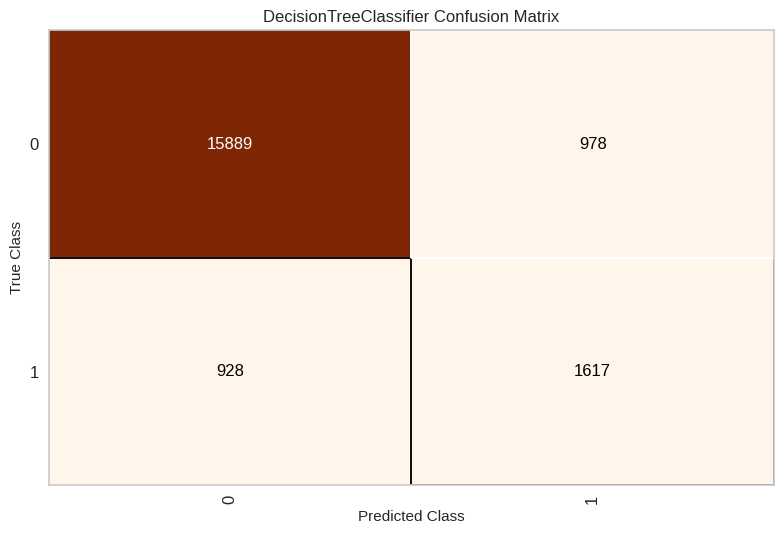

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7989a567c610>,
                estimator=DecisionTreeClassifier(random_state=55))

In [ ]:
confusion_matrix(clf_dt, X_test, y_test, cmap="Oranges")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


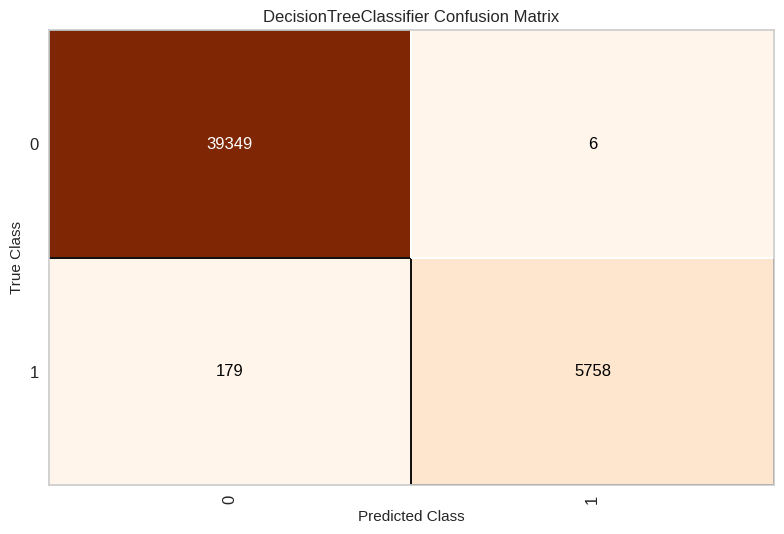

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7989a5e3fe20>,
                estimator=DecisionTreeClassifier(random_state=55))

In [ ]:
confusion_matrix(clf_dt, X_train, y_train, cmap="oranges")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


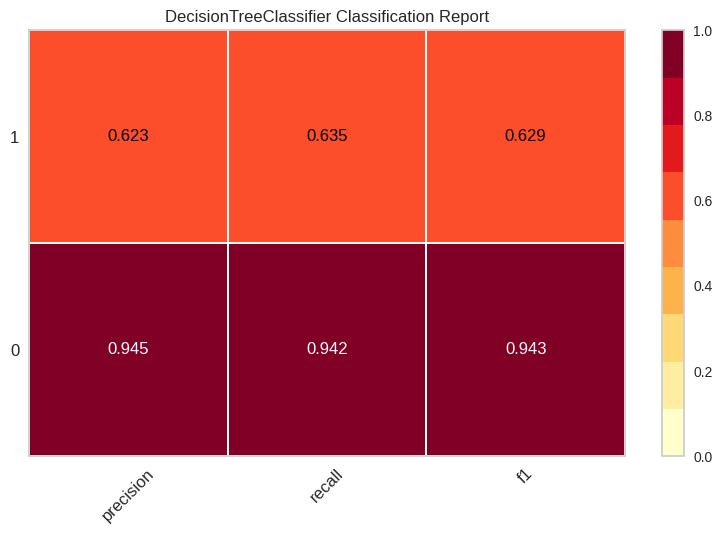

In [ ]:
class_report_log_reg_base = classification_report(clf_dt, X_test, y_test)

In [ ]:
plt.figure(figsize=(200,50))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=True,
          feature_names=X_train.columns);

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']

In [ ]:
ccp_alpahs = ccp_alphas[:-1]

In [ ]:
clf_dts = []

for ccp_alpha in ccp_alphas:
  clf_dt_ = DecisionTreeClassifier(random_state=55, ccp_alpha=ccp_alpha)
  clf_dt_.fit(X_train, y_train)
  clf_dts.append(clf_dt_)

In [ ]:
train_scores = [clf_dt_.score(X_train, y_train) for clf_dt_ in clf_dts]
test_scores = [clf_dt_.score(X_test, y_test) for clf_dt_ in clf_dts]

plotting the train scores and test scores

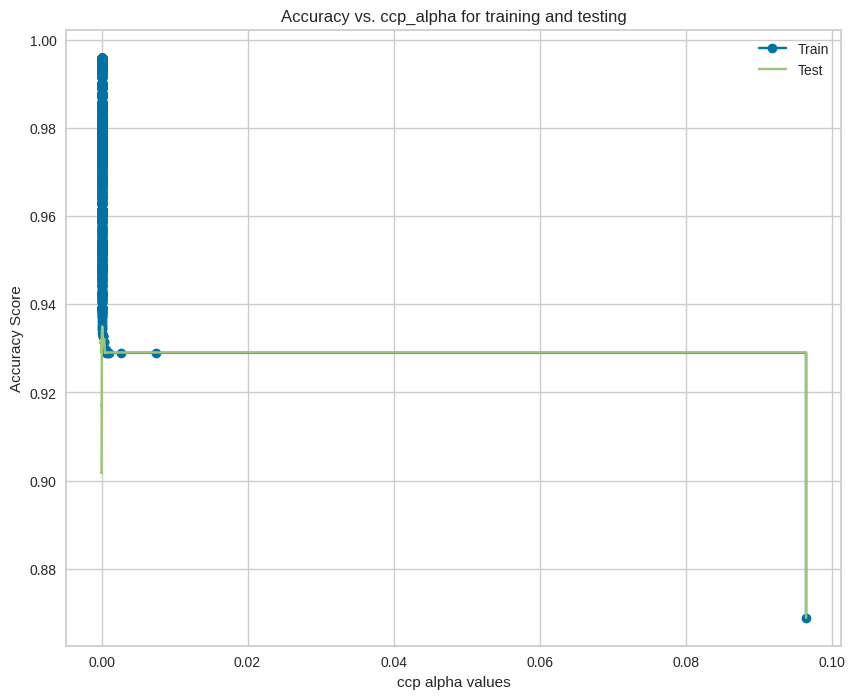

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("ccp alpha values")
ax.set_ylabel("Accuracy Score")
ax.set_title("Accuracy vs. ccp_alpha for training and testing")

ax.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='x', label="Test", drawstyle='steps-post')
ax.legend()
plt.show()

In [ ]:
# for this case, 0.3 was selected by eye balling the above plot
ccp_alpha_best = 0.15

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=55, ccp_alpha=ccp_alpha_best)
clf_dt_pruned.fit(X_train, y_train)
y_pred_res_pruned = clf_dt_pruned.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


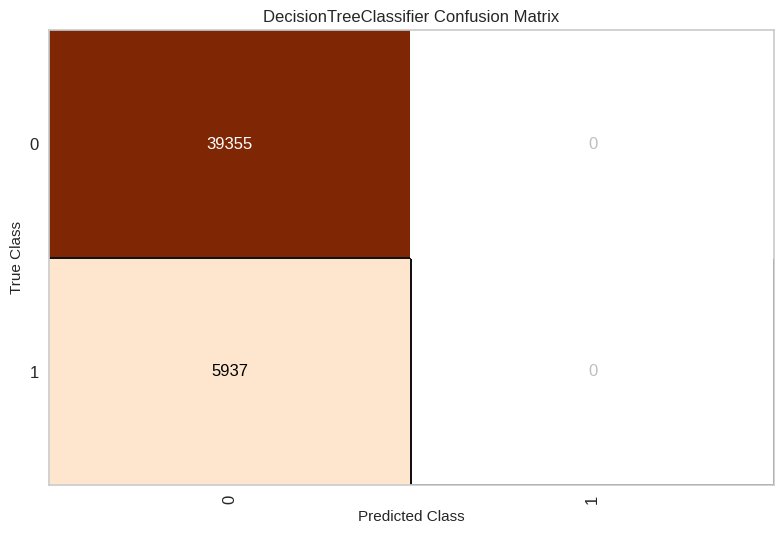

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7989a231f880>,
                estimator=DecisionTreeClassifier(ccp_alpha=0.15,
                                                 random_state=55))

In [ ]:
confusion_matrix(clf_dt_pruned, X_train, y_train, cmap="oranges")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


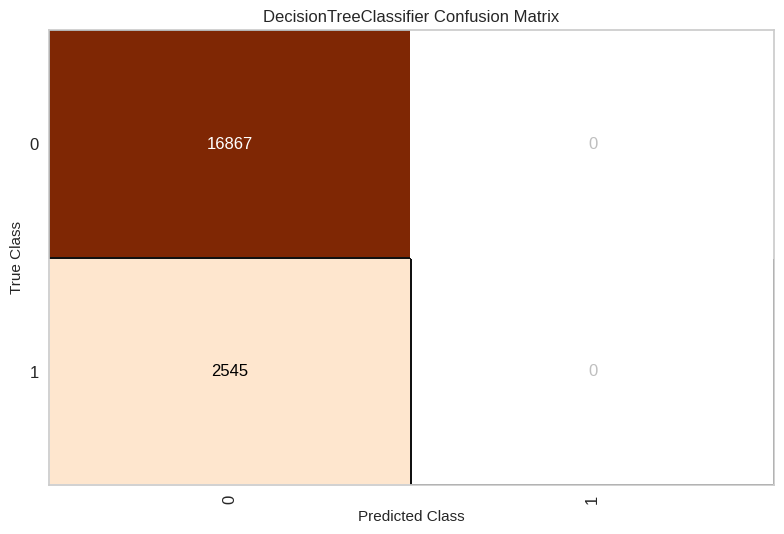

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7989a231eb30>,
                estimator=DecisionTreeClassifier(ccp_alpha=0.15,
                                                 random_state=55))

In [ ]:
confusion_matrix(clf_dt_pruned, X_test, y_test, cmap="oranges")

In [ ]:
plt.figure(figsize=(200,50))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=True,
          feature_names=X_train.columns);

###6.4. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

In [ ]:
clf_rf= RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_clf_rf = clf_rf.predict(X_test)

In [ ]:
precision = precision_score(y_test, y_pred_clf_rf)
recall = recall_score(y_test, y_pred_clf_rf)
f1 = f1_score(y_test, y_pred_clf_rf)
accuracy = accuracy_score(y_test, y_pred_clf_rf)

This code calculates precision, recall, F1 score and accuracy for a random forest predictions on the test set.

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

Precision: 0.8303811057434246
Recall: 0.6078585461689587
F1-score: 0.7019056261343013
Accuracy: 0.9323099113950134


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


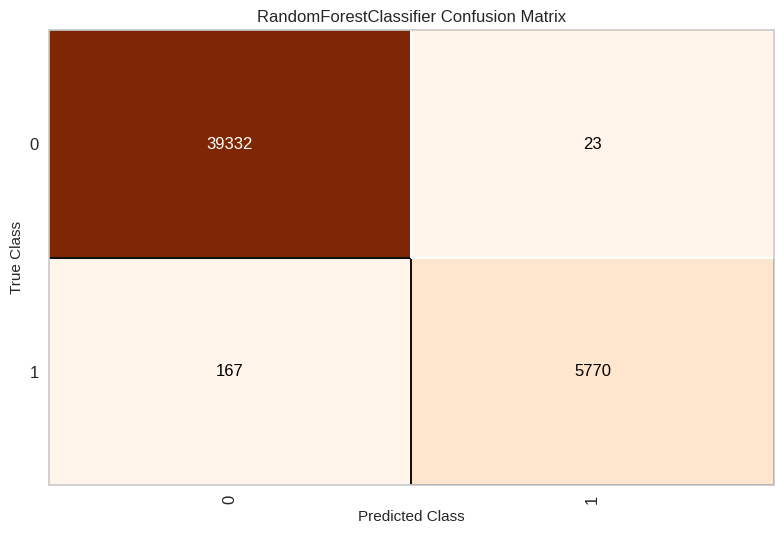

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7989a231d810>,
                estimator=RandomForestClassifier())

In [ ]:
confusion_matrix(clf_rf, X_train, y_train, cmap="Oranges")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


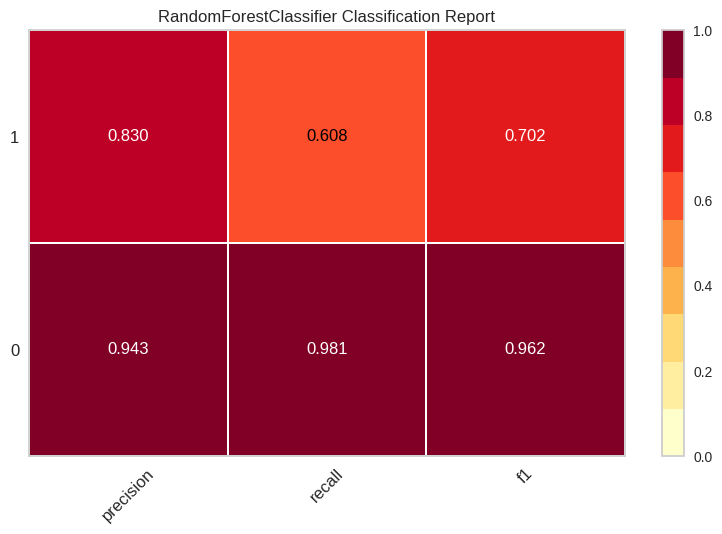

In [ ]:
class_report_log_reg_base = classification_report(clf_rf, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


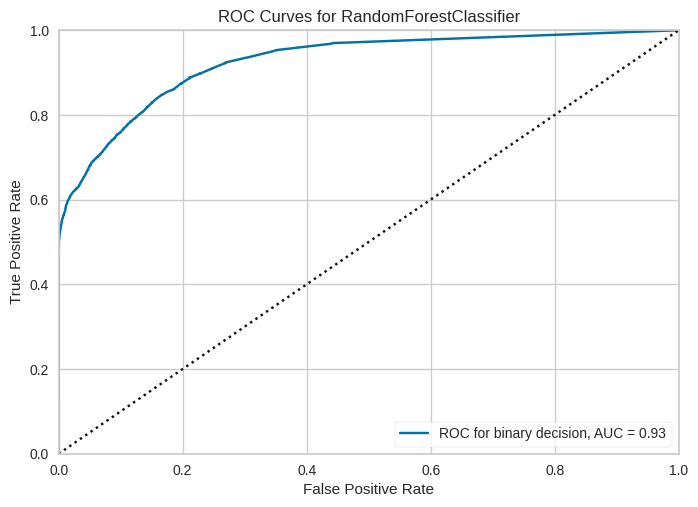

In [ ]:
roc_log_reg_base = roc_auc(clf_rf, X_test, y_test, binary=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<bound method Visualizer.show of FeatureImportances(ax=<Axes: >, estimator=RandomForestClassifier())>

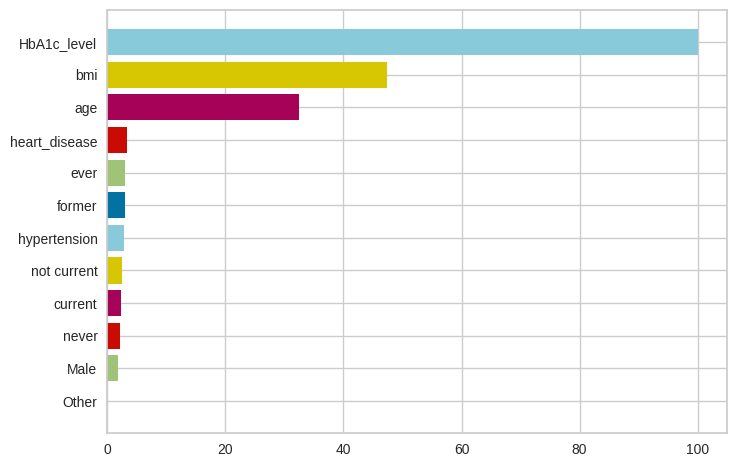

In [ ]:
viz = FeatureImportances(clf_rf)
viz.fit(X, y)
viz.show

### 7.Model comparison


In [ ]:
from sklearn.metrics import RocCurveDisplay

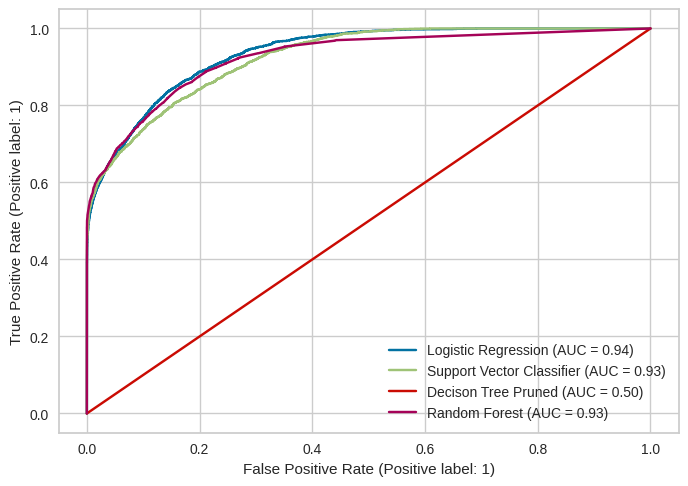

In [ ]:
ax = plt.gca()

LogReg = RocCurveDisplay.from_estimator(log_reg, X_test, y_test,
                                        ax=ax, name="Logistic Regression")
SVC = RocCurveDisplay.from_estimator(svc, X_test_sc, y_test,
                                        ax=ax, name="Support Vector Classifier")

DTPruned = RocCurveDisplay.from_estimator(clf_dt_pruned, X_test, y_test,
                                        ax=ax, name="Decison Tree Pruned")

RandForest = RocCurveDisplay.from_estimator(clf_rf, X_test, y_test,
                                        ax=ax, name="Random Forest")


plt.show()

### What is the suitable algorithm

**Logistic Regression**

* Precision: 0.8882539682539683
* Recall: 0.5497053045186641
* F1-score: 0.6791262135922331
* Accuracy: 0.9318977951782402



**Support Vector Machine**

* Precision: 0.9890848026868178
* Recall: 0.4628683693516699
* F1-score: 0.6306209850107066
* Accuracy: 0.9289099526066351


**Decision Tree**
* Precision: 0.623121387283237
* Recall: 0.6353634577603143
* F1-score: 0.6291828793774319
* Accuracy: 0.9018133113538018


**Random Forest**
* Precision: 0.8303811057434246
* Recall: 0.6078585461689587
* F1-score: 0.7019056261343013
* Accuracy: 0.9323099113950134



The Random Forest model appears to strike a reasonable balance between precision, recall, and overall accuracy. It has a good overall accuracy, a decent F1-score, and a relatively high precision, indicating a low rate of false positives. This random forest model shows a good balance between precision and recall while maintaining a high overall accuracy.

### **Challenges and solutions**

* when doing data preprocessing I faced some problems. when chane categorical data into numerical data I faced Some problems. because smoking_history has 6 type of data. But after I used same method for that also. After I could complete it.


* when doing the model selection part, in that also I had to face some problems. Because it hard to understand what is the best and suitable one. That why I used other model(random forest) as a 4th model. So in that case I consider about the reasonable balance between precision recall, f1 and accuracy. So random forest model shows a good balance between precision and recall while maintaining a high overall accuracy. so I selected it.

* When visualizing among models I could not understand every diagrams. so it also was a problem for me. As a solution I watched some youtube videos to understand those diagrams.

